#### Results from *'Communicability cosine distance: similarity and symmetry in graphs/networks' **(Ernesto Estrada, 2024)***

In [1]:
# Para importar la función communicability_exp
from networkx.algorithms.communicability_alg import communicability_exp, communicability

# Para importar la función communicability_betweenness_centrality
from networkx.algorithms.centrality.subgraph_alg import communicability_betweenness_centrality

import main

##### Showing the inverse relation between $\xi_{vw}$ and $\zeta_{vw}$ 

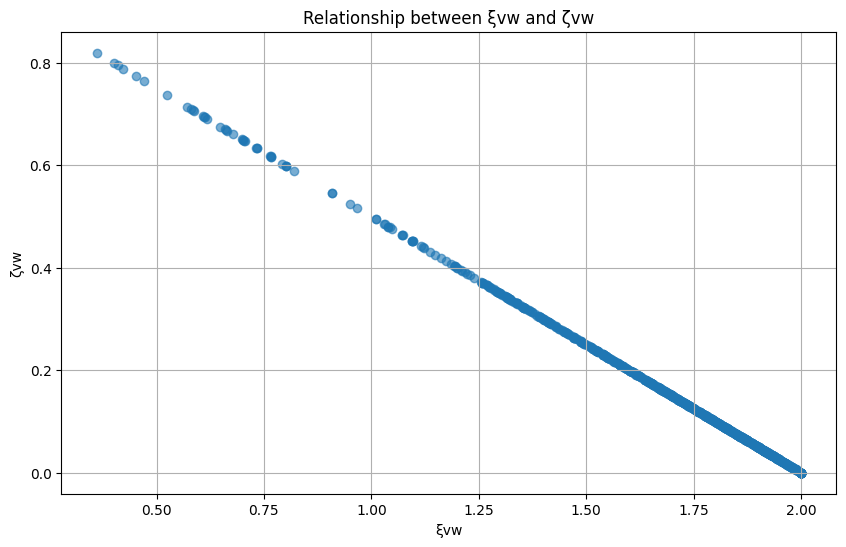

In [2]:
import networkx as nx
import numpy as np
from scipy.linalg import expm
import random
import matplotlib.pyplot as plt
import numpy as np

def calculate_xi_zeta(G, v, w):
    """
    Calculate the proximity measures ξvw and ζvw between two nodes v and w in a graph G.
    Equations 2.7 and 2.8 of Estrada's paper.
    
    Parameters:
    - G: A NetworkX graph.
    - v: The index of the first node.
    - w: The index of the second node.
    
    Returns:
    - ξvw
    - ζvw
    """

    # Convert the graph to an adjacency matrix
    A = nx.to_numpy_array(G)

    # Eigen decomposition of the adjacency matrix
    eigenvalues, eigenvectors = np.linalg.eigh(A)

    # Calculate the matrix X as exp(D/2) * U^T
    X = expm(np.diag(eigenvalues) / 2) @ eigenvectors.T
    X_T = X.T

    centroid = main.find_hypersphere_center(X_T)

    # Get the vectors xv and xw
    xv, xw = X_T[v, :], X_T[w, :]

    # Subtract the centroid from xv and xw
    # xv = xv - centroid
    # xw = xw - centroid

    # Normalize the vectors xv and xw
    xv = xv / np.linalg.norm(xv)
    xw = xw / np.linalg.norm(xw)

    # Calculate ξvw
    xi_vw = np.linalg.norm(xv - xw)**2

    # Calculate ζvw
    zeta_vw = np.dot(xv, xw) / (np.linalg.norm(xv) * np.linalg.norm(xw))

    return xi_vw, zeta_vw

# Example usage:
# Create a random graph
def create_random_graph(n, num_edges):
    """
    Create a random graph with n nodes and num_edges edges.
    
    Parameters:
    - n: Number of nodes
    - num_edges: Number of edges
    
    Returns:
    - G: A random graph
    """
    G = nx.Graph()
    G.add_nodes_from(range(n))
    
    # Add edges randomly
    while G.number_of_edges() < num_edges:
        u, v = random.sample(range(n), 2)
        if not G.has_edge(u, v):
            G.add_edge(u, v)
    
    return G

# Parameters
n = 100  # number of nodes
num_edges = 200  # number of edges
p = 0.3

# Create the random graph
G = create_random_graph(n, num_edges)
# G = nx.erdos_renyi_graph(n, p)

# Select a subset of node pairs to calculate proximity measures
node_pairs = [(np.random.randint(0, n), np.random.randint(0, n)) for _ in range(1000)]

# Calculate proximity measures for selected node pairs
xi_values = []
zeta_values = []

for v, w in node_pairs:
    if v != w:
        xi_vw, zeta_vw = calculate_xi_zeta(G, v, w)
        xi_values.append(xi_vw)
        zeta_values.append(zeta_vw)

# Visualize the relation between ξvw and ζvw using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(xi_values, zeta_values, alpha=0.6)
plt.title('Relationship between ξvw and ζvw')
plt.xlabel('ξvw')
plt.ylabel('ζvw')
plt.grid(True)
plt.show()

##### Centralities of Cycle Graphs (***Table 4***)

In [3]:
import scipy.special

I0_2 = scipy.special.i0(2)
for n in range(4, 13):
    G = nx.cycle_graph(n)
    denominator = 2 * (n * I0_2 - np.exp(2))
    
    print(f'Centralities for cycle for graph of {n} nodes:')
    print('- CCC is', main.calculate_CCC(G, 0))
    print('- Cv is', I0_2 / denominator)
    print(f'- Closeness centrality (CC) is {nx.closeness_centrality(G, 0) / (len(G.nodes) - 1)}')
    print(f'- Reciprocal of closeness centrality (RC) is {6 / (n**2 - 1)}')
    print('-----------------------------------------------------------------------------')

Centralities for cycle for graph of 4 nodes:
- CCC is 0.5575465980060732
- Cv is 0.6591120482702899
- Closeness centrality (CC) is 0.25
- Reciprocal of closeness centrality (RC) is 0.4
-----------------------------------------------------------------------------
Centralities for cycle for graph of 5 nodes:
- CCC is 0.2799080062676446
- Cv is 0.28431765904507
- Closeness centrality (CC) is 0.16666666666666666
- Reciprocal of closeness centrality (RC) is 0.25
-----------------------------------------------------------------------------
Centralities for cycle for graph of 6 nodes:
- CCC is 0.1809535106223849
- Cv is 0.18125159861326795
- Closeness centrality (CC) is 0.11111111111111112
- Reciprocal of closeness centrality (RC) is 0.17142857142857143
-----------------------------------------------------------------------------
Centralities for cycle for graph of 7 nodes:
- CCC is 0.1330057818019767
- Cv is 0.13302838406707404
- Closeness centrality (CC) is 0.08333333333333333
- Reciprocal 

##### Centralities of ***Table 5***

In [4]:
Tab5_edges = [(1,2),(2,3),(2,5),(2,6),(3,4),(3,6),(4,5),(4,6),(5,7)]

G, node_indices = main.create_indexed_graph(Tab5_edges)
rcc = main.calculate_rcc(G)
for i in node_indices.keys():
    node = node_indices[i]
    print(f'Centralities for node {i}:')
    print(f'- Closeness centrality (CC) is {nx.closeness_centrality(G, node) / (len(G.nodes) - 1)}')
    print(f'- Resistance centrality (RC) is {rcc[node]}')
    print('- Communicability Cosine Centrality (CCC) is', main.calculate_CCC(G, node))
    print('------------------------------------------------------------------')

Centralities for node 1:
- Closeness centrality (CC) is 0.07692307692307693
- Resistance centrality (RC) is 0.09917355371900828
- Communicability Cosine Centrality (CCC) is 0.13971584612188637
------------------------------------------------------------------
Centralities for node 2:
- Closeness centrality (CC) is 0.125
- Resistance centrality (RC) is 0.19672131147540975
- Communicability Cosine Centrality (CCC) is 0.27891564648397077
------------------------------------------------------------------
Centralities for node 3:
- Closeness centrality (CC) is 0.09999999999999999
- Resistance centrality (RC) is 0.1702127659574467
- Communicability Cosine Centrality (CCC) is 0.23954907758674454
------------------------------------------------------------------
Centralities for node 4:
- Closeness centrality (CC) is 0.09999999999999999
- Resistance centrality (RC) is 0.1739130434782608
- Communicability Cosine Centrality (CCC) is 0.23758306143931732
-------------------------------------------